In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv('train.csv')


**Data Cleansing**

In [2]:
'''
When reviewing the data description provided by the client. It was mentioned some of these 
data values are not truely missing. We will replace the missing values for 14 columns'
'''

values = {'Alley':'No alley access','BsmtQual':'No Basement','BsmtCond':'No Basement','BsmtExposure':'No Basement',
          'BsmtFinType1':'No Basement','BsmtFinType2':'No Basement','FireplaceQu':'No Fireplace','GarageType':'No Garage',
          'GarageFinish':'No Garage','GarageQual':'No Garage','GarageCond':'No Garage','PoolQC':'No Pool','Fence':'No Fence',
          'MiscFeature':'None'
         }
df = df.fillna(value=values)
new_missing_values = str(df.isnull().sum().sum())
print('There are now ' + new_missing_values +' total missing values ' + ' in the dataframe')



There are now 357 total missing values  in the dataframe


In [3]:
'''
To make the data values easier to interpret 
we will replace the values that are abbreviated for some columns in the data frame
'''
new_MSZoning_values = {
    'A':'Agriculture','C':'Commercial','FV':'Floating Village Residential','I':'Industrial',
    'RH':'Residential High Density','RL':'Residential Low Density','RP':'Residential Low Density Park','RM':'Residential Medium Density'
}
new_MSSubClass_values ={
    20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',45:'1-1/2 STORY - UNFINISHED ALL AGES',
    50:'1-1/2 STORY FINISHED ALL AGES',60:'2-STORY 1946 & NEWER',70:'2-STORY 1945 & OLDER',75:'2-1/2 STORY ALL AGES',80:'SPLIT OR MULTI-LEVEL',
    85:'SPLIT FOYER',90:'DUPLEX - ALL STYLES AND AGES',120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',150:'1-1/2 STORY PUD - ALL AGES',
    160:'2-STORY PUD - 1946 & NEWER',180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'
}
new_Neighborhood_values = {
    'Blmngtn':'Bloomington Heights','Blueste':'Bluestem','BrDale':'Briardale','BrkSide':'Brookside',
    'ClearCr':'Clear Creek','CollgCr':'College Creek','Crawfor':'Crawford','IDOTRR':'Iowa DOT and Rail Road',
    'MeadowV':'Meadow Village','NAmes':'North Ames','NoRidge':'Northridge','NPkVill':'Northpark Villa',
    'NridgHt':'Northridge Heights','NWAmes':'Northwest Ames','SWISU':'South & West of Iowa State University',
    'SawyerW':'Sawyer West','Somerst':'Somerset','StoneBr':'Stone Brook','Timber':'Timberland'
}

df['MSZoning'] = df['MSZoning'].replace(new_MSZoning_values)
df['MSSubClass'] = df['MSSubClass'].replace(new_MSSubClass_values)
df['Neighborhood'] = df['Neighborhood'].replace(new_Neighborhood_values)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

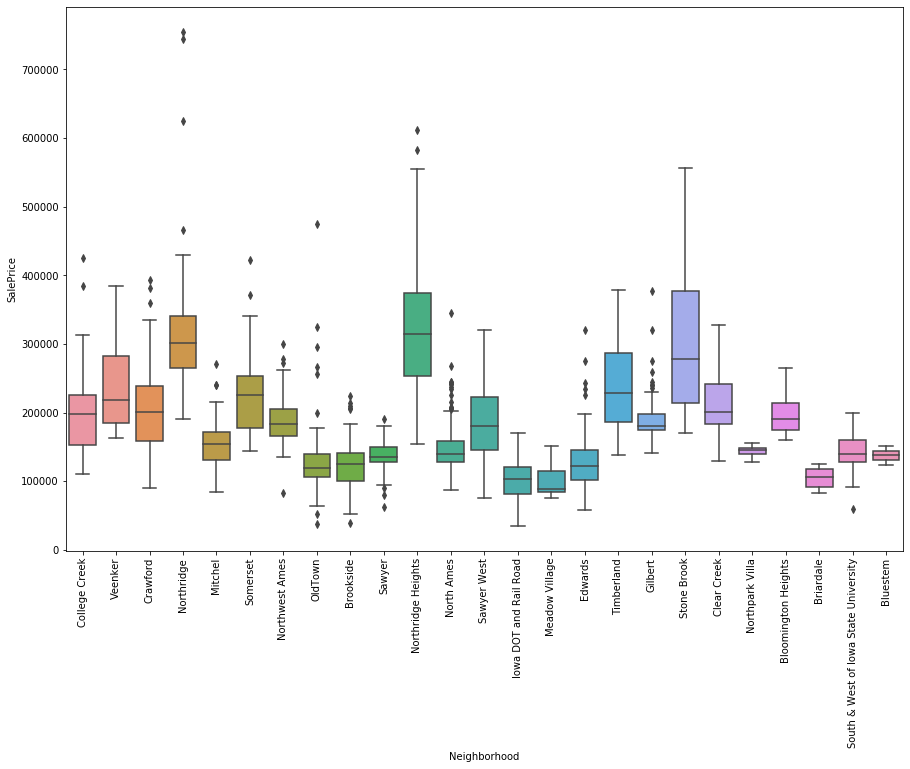

In [4]:
plt.rcParams['figure.figsize'] = (15,10)
ax = sns.boxplot(x="Neighborhood", y="SalePrice", data=df)
plt.xticks(rotation = 90)

**Over half of the neighborhoods have at least one home that was sold for a price that was considered an outlier. Those homes may have specific features that caused the salve price to increase.**

- A significant portion of the number of homes sold tends to be in the first quartile.
- The neighborhoods with a lot of outliers might have several homes with unique features or customized options. 



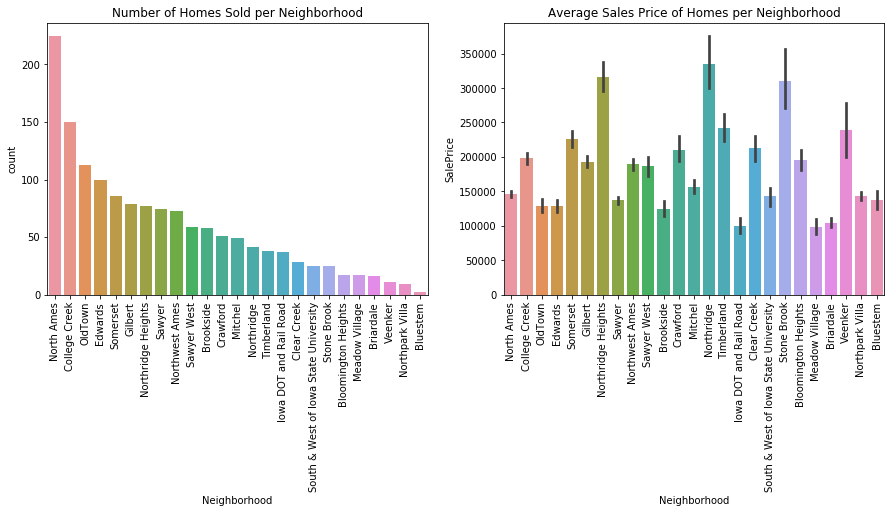

In [5]:
'''
Creating a plot of the number of homes sold per neighborhood
'''
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1,2,1)
plt.title('Number of Homes Sold per Neighborhood')
plt.xticks(rotation = 90)
count_neighboorhood = sns.countplot(x=df['Neighborhood'],
                                    data=df,
                                    order = df['Neighborhood'].value_counts().index)

'''
Creating a plot of the avg sale price per neighborhood
'''
plt.subplot(1,2,2)
avg_sales = round(df.groupby('Neighborhood', as_index=False)['SalePrice'].mean(),2)
plt.title('Average Sales Price of Homes per Neighborhood')
plt.xticks(rotation = 90)
ax = sns.barplot(x='Neighborhood', y='SalePrice', data=df, order = df['Neighborhood'].value_counts().index)


**By comparing the number of homes sold per neighborhood and compare their average sales price. We see that neighborhoods with a lower average sales price tend to sell more homes.**

- There are other factors such as limited availability not accounted for in the data set, which can affect the number of homes sold in each neighborhood
- Some neighborhoods don't follow this general trend. Is this because the homes in their neighborhoods are better in quality, and this causes the sales price to increase?


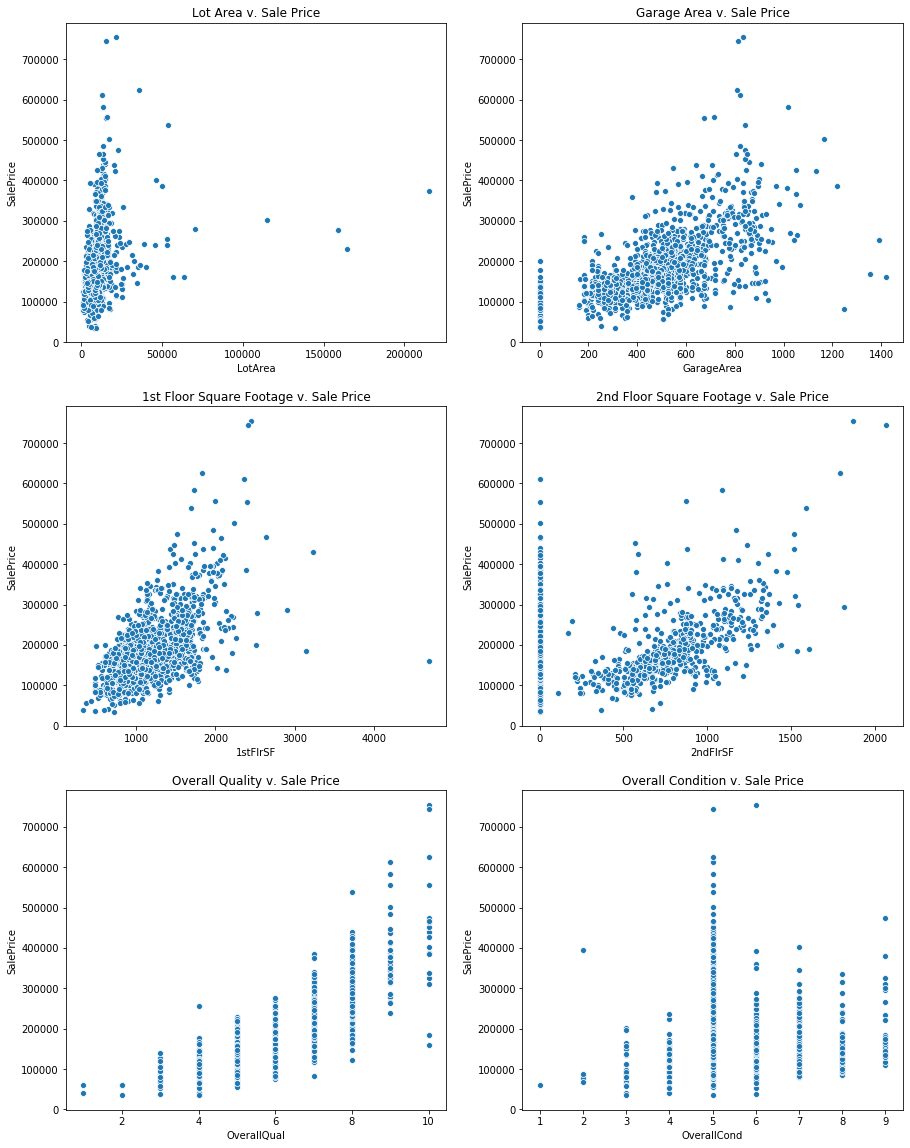

In [6]:
'''
Creating Scatter plots to vizualize any relationship between specific features of homes and sales price 
'''
plt.rcParams['figure.figsize'] = (15,20)
plt.subplot(3,2,1)
plt.title('Lot Area v. Sale Price')
ax = sns.scatterplot(x="LotArea", y="SalePrice", data=df)

plt.subplot(3,2,2)
plt.title('Garage Area v. Sale Price')
ax = sns.scatterplot(x="GarageArea", y="SalePrice", data=df)

plt.subplot(3,2,3)
plt.title('1st Floor Square Footage v. Sale Price')
ax = sns.scatterplot(x="1stFlrSF", y="SalePrice", data=df)

plt.subplot(3,2,4)
plt.title('2nd Floor Square Footage v. Sale Price')
ax = sns.scatterplot(x="2ndFlrSF", y="SalePrice", data=df)

plt.subplot(3,2,5)
plt.title('Overall Quality v. Sale Price')
ax = sns.scatterplot(x="OverallQual", y="SalePrice", data=df)

plt.subplot(3,2,6)
plt.title('Overall Condition v. Sale Price')
ax = sns.scatterplot(x="OverallCond", y="SalePrice", data=df)

**All six variables show some correlation with the sales price. However, the exact strength of the correlation is difficult to determine from a visual perspective.** 
- Square footage of the first floor has a stronger correlation with the sales price. This makes sense because there are more one-story homes than two-story homes. 
- Due to the limited amount of values for overall quality and overall condition, it is hard to get a clear indication of how strong the correlation is. However, there is an indication that a relationship does exist. 
- There appears to be a narrow spread for lot size, indicating that the size of the land properties is built on tend to be similar between all neighborhoods. 

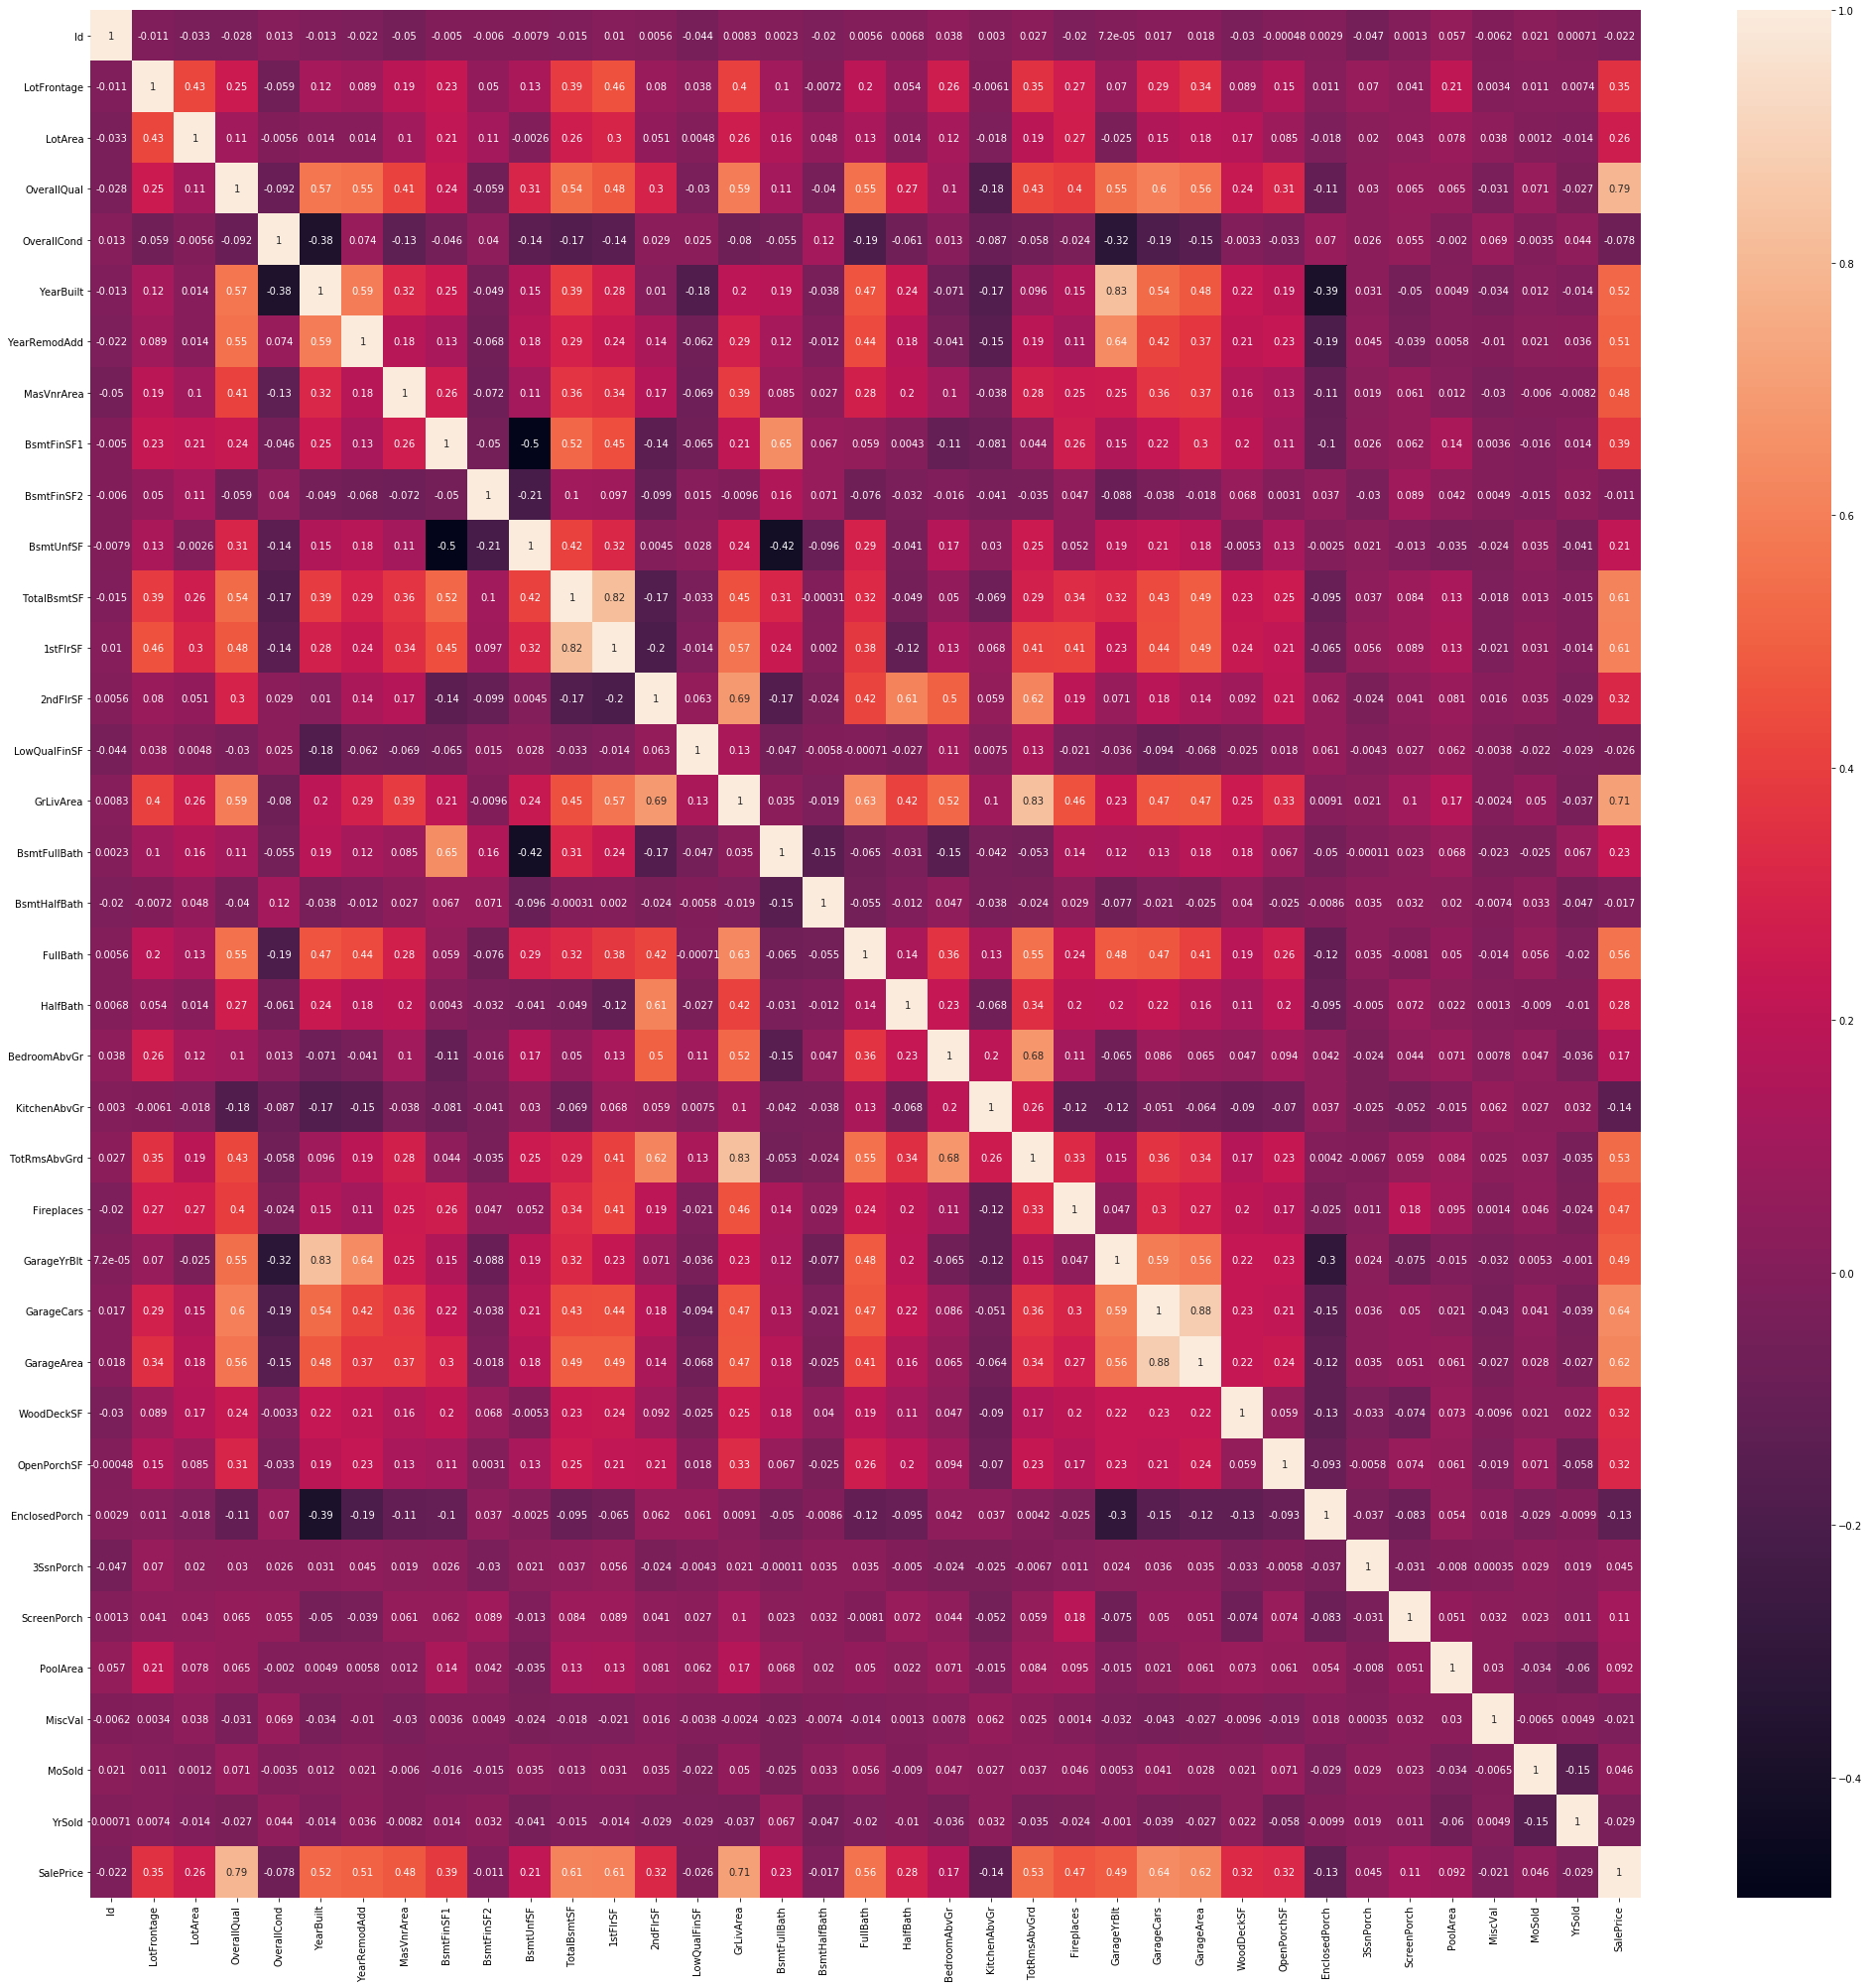

In [7]:
'''
Creating Correlation Matrix to determine strength of linear relationship of variables
'''
fig, ax = plt.subplots(figsize=(35,35)) 
corrMatrix = df.corr()
sns.heatmap(corrMatrix,annot=True)

**The correlation matrix shows that all variables show some correlation with sales price ranging from high to low. Due to a large number of variables, it may be easier to analyze the results in text format.** 

In [8]:
corrMatrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

**The results from the correlation matrix show us that the variables affecting the size of the home, along with age and quality seem to have the most significant impact on the sales price.**
- A feature with a surprisingly low correlation was the overall condition of the homes. Further inspection of the data revealed that all homes were in a condition rated 5 or 6. Due to this limited range, it had a small impact on the sale price of homes. Fixing existing problems will improve the condition of the homes can potentially increase sales prices in the future. 
- It appears that buyers prefer to have a garage over a large amount of land. Perhaps these are busy neighborhoods with a limited amount of parking

In [9]:
'''
Creating Linear Regression model with variable with quantitative values
'''
filt = corrMatrix['SalePrice'].index.tolist()
filt.remove('SalePrice')
y = df['SalePrice']
X= df[filt]
# Replacing null values
X = X.fillna(0)
X = sm.add_constant(X)
OLSmodel =  sm.OLS(y,X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:36:06   Log-Likelihood:                -17327.
No. Observations:                1460   AIC:                         3.472e+04
Df Residuals:                    1425   BIC:                         3.491e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.068e+04   1.42e+06      0.050      0.960   -2.71e+06    2.85e+06
Id               -1.4695      2.196     -0.669      0.504      -5.777       2.839
LotFrontage      42.2845     28.404      1.489      0.137     -13.434      98.003
LotArea           0.4410      0.101      4.369      0.000       0.243       0.639
OverallQual    1.646e+04   1188.991     13.847      0.000    1.41e+04    1.88e+04
OverallCond    5453.8526   1034.954      5.270      0.000    3423.656    7484.050
YearBuilt       332.4232     61.247      5.428      0.000     212.279     452.567
YearRemodAdd    115.7662     66.908      1.730      0.084     -15.482     247.015
MasVnrArea       26.1048      5.990      4.358      0.000      14.354      37.855
BsmtFinSF1        9.8395      2.542      3.870      0.000       4.852      14.827
BsmtFinSF2        0.3448      4.534      0.076      0.939      -8.549       9.239
BsmtUnfSF         0.0185      2.424      0.008      0.994      -4.737       4.774
TotalBsmtSF      10.2029      3.382      3.017      0.003       3.569      16.837
1stFlrSF         24.2290      6.108      3.967      0.000      12.248      36.210
2ndFlrSF         17.3651      5.704      3.044      0.002       6.176      28.554
LowQualFinSF    -17.3801     14.882     -1.168      0.243     -46.573      11.813
GrLivArea        24.2141      5.671      4.270      0.000      13.089      35.339
BsmtFullBath   7057.0566   2618.664      2.695      0.007    1920.207    1.22e+04
BsmtHalfBath    182.9203   4101.370      0.045      0.964   -7862.452    8228.292
FullBath       2098.4218   2832.349      0.741      0.459   -3457.600    7654.443
HalfBath      -1642.6382   2677.374     -0.614      0.540   -6894.657    3609.380
BedroomAbvGr  -8875.3145   1687.981     -5.258      0.000   -1.22e+04   -5564.121
KitchenAbvGr  -2.743e+04   4921.439     -5.573      0.000   -3.71e+04   -1.78e+04
TotRmsAbvGrd   5788.7407   1238.190      4.675      0.000    3359.870    8217.611
Fireplaces     4075.9166   1781.270      2.288      0.022     581.724    7570.109
GarageYrBlt     -14.4074      2.720     -5.298      0.000     -19.742      -9.073
GarageCars      1.54e+04   3013.953      5.108      0.000    9483.185    2.13e+04
GarageArea        9.3509      9.823      0.952      0.341      -9.918      28.620
WoodDeckSF       25.6740      8.033      3.196      0.001       9.916      41.432
OpenPorchSF      -4.0617     15.256     -0.266      0.790     -33.989      25.866
EnclosedPorch    13.8918     16.936      0.820      0.412     -19.330      47.113
3SsnPorch        25.2717     31.547      0.801      0.423     -36.611      87.154
ScreenPorch      56.6112     17.268      3.278      0.001      22.737      90.486
PoolArea        -37.3670     23.846     -1.567      0.117     -84.144       9.410
MiscVal          -0.0579      1.868     -0.031   

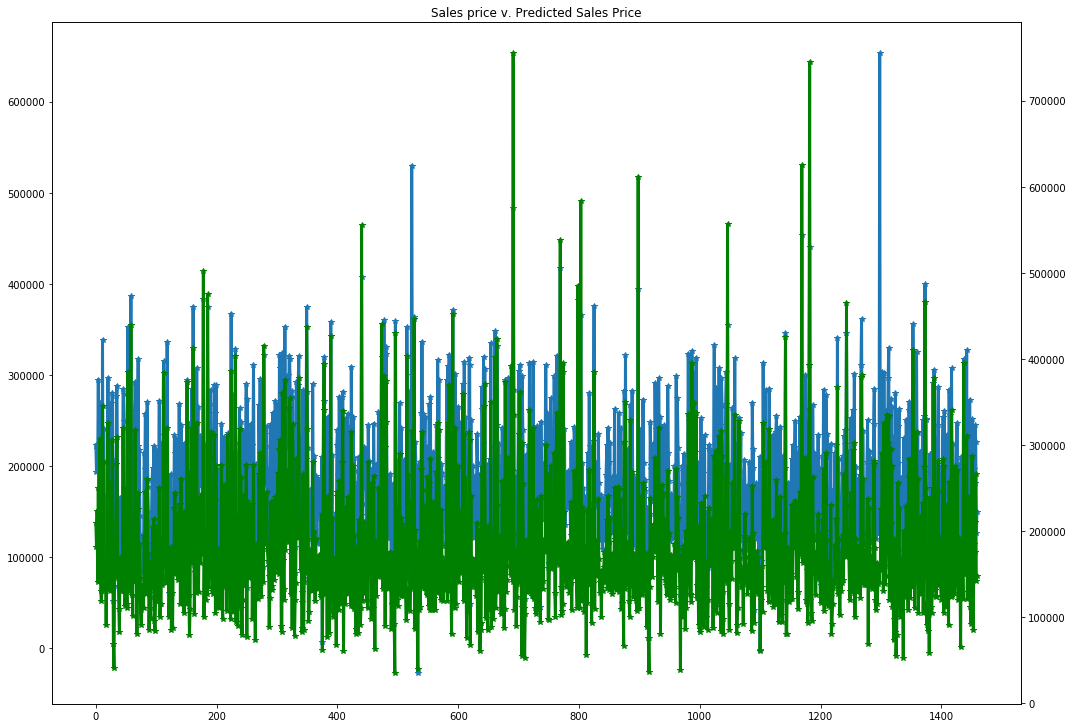

In [10]:
#Ploting Actual sales price v Predicted Home prices
plt.rcParams['figure.figsize'] = (15,10)
ax = OLSmodelResult.predict(X).plot(linewidth=3, marker = '*')
ax2 = ax.twinx()
ax2.plot(df['SalePrice'], 'green', linewidth = 3, marker = '*')
plt.tight_layout()
plt.title("Sales price v. Predicted Sales Price")
plt.show()

#Sort by sales price

**The initial results from our regression model when we account for all variables came back with very good results. The R^2 of 0.81 shows that the model was able to accurately predict 81% percent of the home's sales price.**

- To see if we can get an R^2 around 0.95 we will run another regression with only variables that have a correlation coefficient of 0.5 or greater.
- The more accurate the model we can generate will improve our chances of identifying which neighborhoods that have the most undervalued properties. 

In [11]:

corrfilt = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']
df['SalePrice'] = df['SalePrice'].sort_values()
y = df['SalePrice']

X= df[corrfilt]
# Replacing null values
X = X.fillna(0)


X = sm.add_constant(X)
OLSmodel =  sm.OLS(y,X)
OLSmodelResult = OLSmodel.fit()
OLSmodelResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     495.4
Date:                Sat, 06 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:36:06   Log-Likelihood:                -17459.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1449   BIC:                         3.500e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.186e+06   1.29e+05     -9.187      0.000   -1.44e+06   -9.33e+05
OverallQual    1.96e+04   1190.159     16.472      0.000    1.73e+04    2.19e+04
GrLivArea       51.2971      4.233     12.119      0.000      42.994      59.600
GarageCars    1.042e+04   3044.272      3.422      0.001    4446.249    1.64e+04
GarageArea      14.9475     10.311      1.450      0.147      -5.279      35.174
TotalBsmtSF     19.8651      4.295      4.625      0.000      11.439      28.291
1stFlrSF        14.1737      4.930      2.875      0.004       4.504      23.844
FullBath     -6790.8715   2682.369     -2.532      0.011   -1.21e+04   -1529.130
TotRmsAbvGrd    33.1051   1119.061      0.030      0.976   -2162.048    2228.258
YearBuilt      268.2407     50.346      5.328      0.000     169.481     367.000
YearRemodAdd   296.4812     63.635      4.659      0.000     171.655     421.307
==============================================================================
Omnibus:                      477.814   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58906.279
Skew:                          -0.412   Prob(JB):                         0.00
Kurtosis:                      34.107   Cond. No.                     4.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

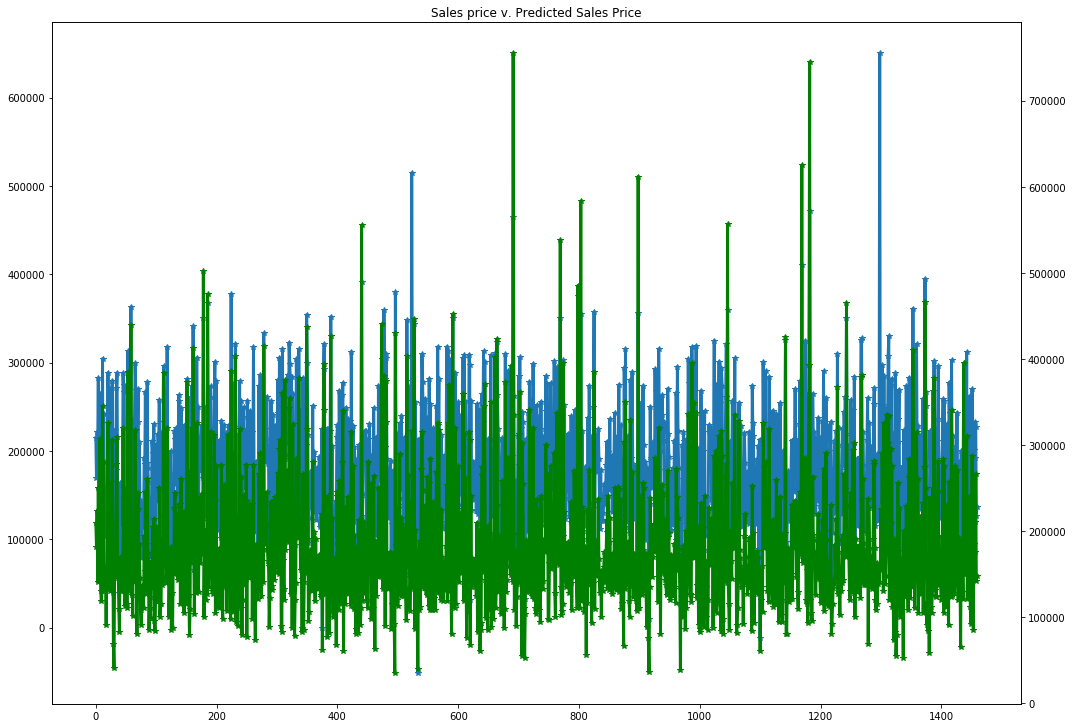

In [12]:
#Ploting Actual sales price v Predicted Home prices
plt.rcParams['figure.figsize'] = (15,10)
ax = OLSmodelResult.predict(X).plot(linewidth=3, marker = '*')
ax2 = ax.twinx()
ax2.plot(df['SalePrice'], 'green', linewidth = 3, marker = '*')
plt.tight_layout()
plt.title("Sales price v. Predicted Sales Price")
plt.show()


**Running the regression with only variables with a correlation coefficient of 0.5 or greater came back with results worse than our original, with an R^2  0.77, perhaps it is better to use our original model.**
